In [1]:
import numpy as np
import pandas as pd
import pywt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import multiprocessing as mp
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed
import matplotlib.pyplot as plt

In [2]:
# load the ECG data
normal = pd.read_csv('./data/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('./data/ptbdb_abnormal.csv',header=None)
data_test = pd.read_csv('./data/mitbih_test.csv', header=None)

In [32]:
data_train.shape

(87554, 188)

In [3]:
data_train.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4]:
abnormal.shape, normal.shape

((10506, 188), (4046, 188))

In [5]:
data_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [7]:
abnormal.shape, normal.shape

((10506, 188), (4046, 188))

In [8]:
abnormal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\srist\AppData\Local\Temp\ipykernel_26704\786465372.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


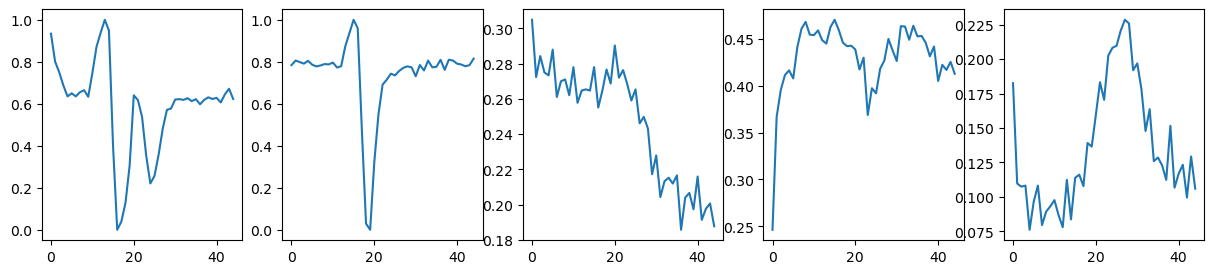

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(abnormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(abnormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(abnormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(abnormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(abnormal.values[44][5:50])

C:\Users\srist\AppData\Local\Temp\ipykernel_26704\2701466339.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


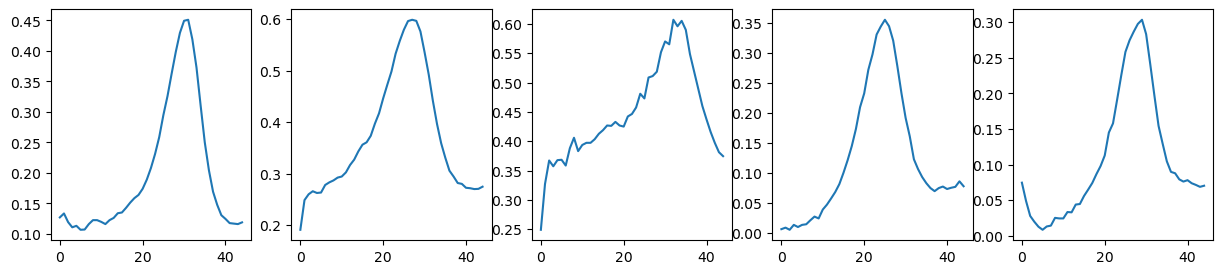

In [11]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(normal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(normal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(normal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(normal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(normal.values[77][5:50])

In [13]:
p1 = [0 for i in range(normal.shape[0])]
p2 = [1 for i in range(abnormal.shape[0])]
normal[188] = p1
abnormal[188] = p2
y = p1 + p2

In [14]:
data = pd.concat([normal,abnormal])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


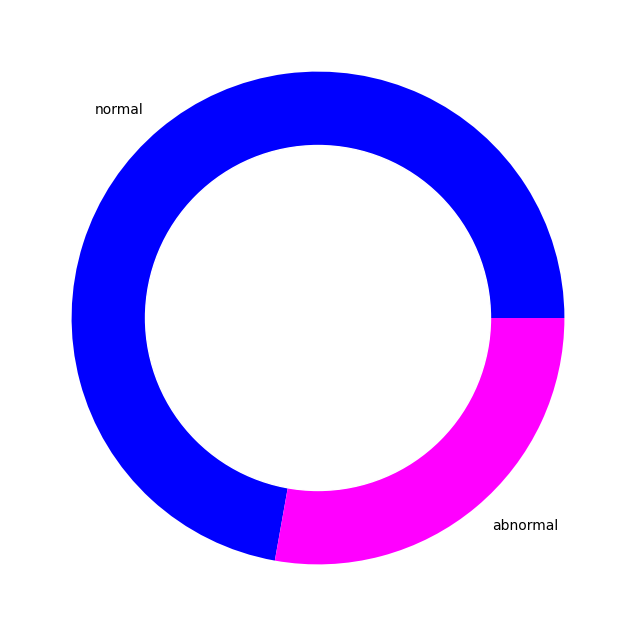

In [66]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data[188].value_counts(), labels=['normal','abnormal'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [27]:
data.shape

(14552, 189)

In [15]:
labels = data.iloc[:, :].values

In [16]:
# Define the CWT parameters
wavelet = "morl"
scales = np.arange(1, 128)
sampling_rate=360

In [18]:
# Apply CWT to the signals
import scipy
cwt_data = []
for signal in labels:
    cwtmatr, _ = pywt.cwt(signal, scales, wavelet,sampling_period=1/sampling_rate)
    # Extract features from the CWT coefficients
    mean_coef = np.mean(cwtmatr, axis=1)
    var_coef = np.var(cwtmatr, axis=1)
    skew_coef = scipy.stats.skew(cwtmatr, axis=1)
    kurt_coef = scipy.stats.kurtosis(cwtmatr, axis=1)

    # Combine features into a feature vector
    feature_vector = np.concatenate((mean_coef, var_coef, skew_coef, kurt_coef))
    cwt_data.append(feature_vector)

 

In [19]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(cwt_data, y, test_size=0.4, random_state=19)

In [20]:
X_train = tf.expand_dims(X_train,axis=-1)
X_val = tf.expand_dims(X_val,axis=-1)
y_train = tf.expand_dims(y_train,axis=-1)
y_val = tf.expand_dims(y_val,axis=-1)

In [21]:
# Define the RCNN model
model = models.Sequential([
    layers.Conv1D(32, 3, activation="relu", input_shape=(X_train.shape[1],1)),
     layers.MaxPooling1D(2),
    layers.Dropout(0.2),
    layers.Conv1D(64, 3, activation="relu", padding='same'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer="adam",loss='binary_crossentropy', metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 506, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 253, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 253, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 253, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 126, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 126, 64)           0

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=None, validation_data=(X_val, y_val))

Epoch 1/10
273/273 [==============================] - 28s 92ms/step - loss: 0.4434 - accuracy: 0.8094 - val_loss: 0.1809 - val_accuracy: 0.9383
Epoch 2/10
273/273 [==============================] - 24s 89ms/step - loss: 0.1433 - accuracy: 0.9501 - val_loss: 0.1537 - val_accuracy: 0.9516
Epoch 3/10
273/273 [==============================] - 25s 90ms/step - loss: 0.1179 - accuracy: 0.9588 - val_loss: 0.1589 - val_accuracy: 0.9519
Epoch 4/10
273/273 [==============================] - 25s 91ms/step - loss: 0.0868 - accuracy: 0.9709 - val_loss: 0.0687 - val_accuracy: 0.9765
Epoch 5/10
273/273 [==============================] - 25s 92ms/step - loss: 0.0770 - accuracy: 0.9725 - val_loss: 0.0620 - val_accuracy: 0.9804
Epoch 6/10
273/273 [==============================] - 24s 88ms/step - loss: 0.0679 - accuracy: 0.9773 - val_loss: 0.0495 - val_accuracy: 0.9823
Epoch 7/10
273/273 [==============================] - 24s 89ms/step - loss: 0.0649 - accuracy: 0.9764 - val_loss: 0.0814 - val_accuracy:

In [61]:
loss,accuracy=model.evaluate(X_val,y_val)

182/182 [==============================] - 6s 33ms/step - loss: 0.0683 - accuracy: 0.9804


In [63]:
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy*100)

Testing Loss: 0.06833706051111221
Testing Accuracy: 98.04157614707947


In [26]:
def test_model(model, data):
    # Apply CWT to the new data
    cwt_data = []
    for signal in data:
        cwtmatr, _ = pywt.cwt(signal, scales, wavelet, sampling_period=1/sampling_rate)
        mean_coef = np.mean(cwtmatr, axis=1)
        var_coef = np.var(cwtmatr, axis=1)
        skew_coef = scipy.stats.skew(cwtmatr, axis=1)
        kurt_coef = scipy.stats.kurtosis(cwtmatr, axis=1)
        feature_vector = np.concatenate((mean_coef, var_coef, skew_coef, kurt_coef))
        cwt_data.append(feature_vector)

    # Expand dimensions for compatibility with the model
    cwt_data = tf.expand_dims(cwt_data, axis=-1)

    # Make predictions
    predictions = model.predict(cwt_data)

    return predictions


In [30]:
new_data_array = np.array(data_test)

In [31]:
predictions = test_model(model, new_data_array)
print(predictions)

685/685 [==============================] - 14s 19ms/step
[[0.00149278]
 [0.00622345]
 [0.00173414]
 ...
 [0.066434  ]
 [0.9864542 ]
 [0.9925275 ]]


In [53]:
predictions.shape

(21892, 1)

In [60]:
threshold=0.5
for prediction in predictions[0]:
    if prediction.mean() >= threshold:
        print("Abnormal heartbeat")
    else:
        print("Normal heartbeat")

Normal heartbeat


In [64]:
predictions = model.predict(X_val)

# Define the threshold for classification (adjust as needed)
threshold = 0.5

# Classify the entire heartbeat as normal or abnormal
is_abnormal = (predictions.mean(axis=1) >= threshold)

# Compare the predicted labels with the ground truth labels
for i in range(len(y_val)):
    if is_abnormal[i]:
        predicted_label = "Abnormal"
    else:
        predicted_label = "Normal"

    if y_val[i] == 1:
        actual_label = "Abnormal"
    else:
        actual_label = "Normal"

    print("Sample", i+1, "- Predicted:", predicted_label, "Actual:", actual_label)

182/182 [==============================] - 6s 31ms/step
Sample 1 - Predicted: Abnormal Actual: Abnormal
Sample 2 - Predicted: Abnormal Actual: Abnormal
Sample 3 - Predicted: Normal Actual: Normal
Sample 4 - Predicted: Abnormal Actual: Abnormal
Sample 5 - Predicted: Abnormal Actual: Abnormal
Sample 6 - Predicted: Abnormal Actual: Abnormal
Sample 7 - Predicted: Abnormal Actual: Abnormal
Sample 8 - Predicted: Abnormal Actual: Abnormal
Sample 9 - Predicted: Abnormal Actual: Abnormal
Sample 10 - Predicted: Abnormal Actual: Abnormal
Sample 11 - Predicted: Abnormal Actual: Abnormal
Sample 12 - Predicted: Abnormal Actual: Normal
Sample 13 - Predicted: Normal Actual: Normal
Sample 14 - Predicted: Normal Actual: Normal
Sample 15 - Predicted: Normal Actual: Normal
Sample 16 - Predicted: Abnormal Actual: Abnormal
Sample 17 - Predicted: Abnormal Actual: Abnormal
Sample 18 - Predicted: Abnormal Actual: Abnormal
Sample 19 - Predicted: Abnormal Actual: Abnormal
Sample 20 - Predicted: Normal Actual: No

Sample 370 - Predicted: Abnormal Actual: Abnormal
Sample 371 - Predicted: Abnormal Actual: Abnormal
Sample 372 - Predicted: Normal Actual: Normal
Sample 373 - Predicted: Normal Actual: Normal
Sample 374 - Predicted: Abnormal Actual: Abnormal
Sample 375 - Predicted: Abnormal Actual: Abnormal
Sample 376 - Predicted: Normal Actual: Normal
Sample 377 - Predicted: Normal Actual: Normal
Sample 378 - Predicted: Normal Actual: Normal
Sample 379 - Predicted: Abnormal Actual: Abnormal
Sample 380 - Predicted: Normal Actual: Normal
Sample 381 - Predicted: Abnormal Actual: Abnormal
Sample 382 - Predicted: Abnormal Actual: Abnormal
Sample 383 - Predicted: Abnormal Actual: Abnormal
Sample 384 - Predicted: Abnormal Actual: Abnormal
Sample 385 - Predicted: Abnormal Actual: Abnormal
Sample 386 - Predicted: Normal Actual: Normal
Sample 387 - Predicted: Abnormal Actual: Abnormal
Sample 388 - Predicted: Abnormal Actual: Abnormal
Sample 389 - Predicted: Abnormal Actual: Abnormal
Sample 390 - Predicted: Abno

Sample 673 - Predicted: Normal Actual: Normal
Sample 674 - Predicted: Abnormal Actual: Abnormal
Sample 675 - Predicted: Abnormal Actual: Abnormal
Sample 676 - Predicted: Abnormal Actual: Abnormal
Sample 677 - Predicted: Abnormal Actual: Abnormal
Sample 678 - Predicted: Normal Actual: Normal
Sample 679 - Predicted: Normal Actual: Normal
Sample 680 - Predicted: Normal Actual: Normal
Sample 681 - Predicted: Normal Actual: Normal
Sample 682 - Predicted: Abnormal Actual: Abnormal
Sample 683 - Predicted: Abnormal Actual: Abnormal
Sample 684 - Predicted: Abnormal Actual: Abnormal
Sample 685 - Predicted: Abnormal Actual: Abnormal
Sample 686 - Predicted: Abnormal Actual: Normal
Sample 687 - Predicted: Normal Actual: Normal
Sample 688 - Predicted: Abnormal Actual: Abnormal
Sample 689 - Predicted: Abnormal Actual: Abnormal
Sample 690 - Predicted: Abnormal Actual: Abnormal
Sample 691 - Predicted: Normal Actual: Normal
Sample 692 - Predicted: Abnormal Actual: Abnormal
Sample 693 - Predicted: Abnorm

Sample 1009 - Predicted: Abnormal Actual: Abnormal
Sample 1010 - Predicted: Normal Actual: Normal
Sample 1011 - Predicted: Abnormal Actual: Abnormal
Sample 1012 - Predicted: Abnormal Actual: Abnormal
Sample 1013 - Predicted: Abnormal Actual: Abnormal
Sample 1014 - Predicted: Normal Actual: Normal
Sample 1015 - Predicted: Normal Actual: Normal
Sample 1016 - Predicted: Abnormal Actual: Abnormal
Sample 1017 - Predicted: Normal Actual: Normal
Sample 1018 - Predicted: Normal Actual: Normal
Sample 1019 - Predicted: Abnormal Actual: Abnormal
Sample 1020 - Predicted: Normal Actual: Normal
Sample 1021 - Predicted: Abnormal Actual: Abnormal
Sample 1022 - Predicted: Normal Actual: Normal
Sample 1023 - Predicted: Abnormal Actual: Abnormal
Sample 1024 - Predicted: Abnormal Actual: Abnormal
Sample 1025 - Predicted: Normal Actual: Normal
Sample 1026 - Predicted: Abnormal Actual: Abnormal
Sample 1027 - Predicted: Abnormal Actual: Abnormal
Sample 1028 - Predicted: Normal Actual: Normal
Sample 1029 - Pr

Sample 1236 - Predicted: Abnormal Actual: Abnormal
Sample 1237 - Predicted: Abnormal Actual: Abnormal
Sample 1238 - Predicted: Abnormal Actual: Abnormal
Sample 1239 - Predicted: Abnormal Actual: Abnormal
Sample 1240 - Predicted: Abnormal Actual: Abnormal
Sample 1241 - Predicted: Normal Actual: Normal
Sample 1242 - Predicted: Abnormal Actual: Abnormal
Sample 1243 - Predicted: Normal Actual: Normal
Sample 1244 - Predicted: Abnormal Actual: Abnormal
Sample 1245 - Predicted: Abnormal Actual: Abnormal
Sample 1246 - Predicted: Normal Actual: Normal
Sample 1247 - Predicted: Abnormal Actual: Abnormal
Sample 1248 - Predicted: Abnormal Actual: Abnormal
Sample 1249 - Predicted: Normal Actual: Normal
Sample 1250 - Predicted: Normal Actual: Normal
Sample 1251 - Predicted: Normal Actual: Normal
Sample 1252 - Predicted: Abnormal Actual: Abnormal
Sample 1253 - Predicted: Abnormal Actual: Abnormal
Sample 1254 - Predicted: Abnormal Actual: Abnormal
Sample 1255 - Predicted: Normal Actual: Normal
Sample 1

Sample 1426 - Predicted: Normal Actual: Normal
Sample 1427 - Predicted: Abnormal Actual: Abnormal
Sample 1428 - Predicted: Abnormal Actual: Abnormal
Sample 1429 - Predicted: Abnormal Actual: Abnormal
Sample 1430 - Predicted: Abnormal Actual: Abnormal
Sample 1431 - Predicted: Abnormal Actual: Abnormal
Sample 1432 - Predicted: Abnormal Actual: Abnormal
Sample 1433 - Predicted: Abnormal Actual: Abnormal
Sample 1434 - Predicted: Abnormal Actual: Abnormal
Sample 1435 - Predicted: Normal Actual: Normal
Sample 1436 - Predicted: Abnormal Actual: Abnormal
Sample 1437 - Predicted: Normal Actual: Normal
Sample 1438 - Predicted: Normal Actual: Normal
Sample 1439 - Predicted: Abnormal Actual: Abnormal
Sample 1440 - Predicted: Abnormal Actual: Abnormal
Sample 1441 - Predicted: Abnormal Actual: Abnormal
Sample 1442 - Predicted: Abnormal Actual: Abnormal
Sample 1443 - Predicted: Abnormal Actual: Abnormal
Sample 1444 - Predicted: Abnormal Actual: Abnormal
Sample 1445 - Predicted: Abnormal Actual: Abnor

Sample 1659 - Predicted: Abnormal Actual: Abnormal
Sample 1660 - Predicted: Abnormal Actual: Abnormal
Sample 1661 - Predicted: Abnormal Actual: Abnormal
Sample 1662 - Predicted: Abnormal Actual: Abnormal
Sample 1663 - Predicted: Normal Actual: Normal
Sample 1664 - Predicted: Abnormal Actual: Abnormal
Sample 1665 - Predicted: Normal Actual: Normal
Sample 1666 - Predicted: Abnormal Actual: Abnormal
Sample 1667 - Predicted: Normal Actual: Normal
Sample 1668 - Predicted: Normal Actual: Normal
Sample 1669 - Predicted: Abnormal Actual: Abnormal
Sample 1670 - Predicted: Abnormal Actual: Abnormal
Sample 1671 - Predicted: Abnormal Actual: Abnormal
Sample 1672 - Predicted: Abnormal Actual: Abnormal
Sample 1673 - Predicted: Abnormal Actual: Abnormal
Sample 1674 - Predicted: Abnormal Actual: Abnormal
Sample 1675 - Predicted: Abnormal Actual: Abnormal
Sample 1676 - Predicted: Abnormal Actual: Abnormal
Sample 1677 - Predicted: Abnormal Actual: Abnormal
Sample 1678 - Predicted: Normal Actual: Normal


Sample 1889 - Predicted: Normal Actual: Normal
Sample 1890 - Predicted: Abnormal Actual: Abnormal
Sample 1891 - Predicted: Abnormal Actual: Abnormal
Sample 1892 - Predicted: Abnormal Actual: Abnormal
Sample 1893 - Predicted: Abnormal Actual: Abnormal
Sample 1894 - Predicted: Abnormal Actual: Abnormal
Sample 1895 - Predicted: Abnormal Actual: Abnormal
Sample 1896 - Predicted: Abnormal Actual: Abnormal
Sample 1897 - Predicted: Abnormal Actual: Abnormal
Sample 1898 - Predicted: Abnormal Actual: Abnormal
Sample 1899 - Predicted: Normal Actual: Normal
Sample 1900 - Predicted: Normal Actual: Normal
Sample 1901 - Predicted: Abnormal Actual: Abnormal
Sample 1902 - Predicted: Abnormal Actual: Abnormal
Sample 1903 - Predicted: Abnormal Actual: Abnormal
Sample 1904 - Predicted: Abnormal Actual: Abnormal
Sample 1905 - Predicted: Abnormal Actual: Normal
Sample 1906 - Predicted: Abnormal Actual: Abnormal
Sample 1907 - Predicted: Abnormal Actual: Abnormal
Sample 1908 - Predicted: Normal Actual: Norma

Sample 2169 - Predicted: Abnormal Actual: Abnormal
Sample 2170 - Predicted: Normal Actual: Normal
Sample 2171 - Predicted: Normal Actual: Normal
Sample 2172 - Predicted: Abnormal Actual: Abnormal
Sample 2173 - Predicted: Abnormal Actual: Abnormal
Sample 2174 - Predicted: Abnormal Actual: Abnormal
Sample 2175 - Predicted: Abnormal Actual: Abnormal
Sample 2176 - Predicted: Normal Actual: Normal
Sample 2177 - Predicted: Normal Actual: Normal
Sample 2178 - Predicted: Abnormal Actual: Abnormal
Sample 2179 - Predicted: Normal Actual: Normal
Sample 2180 - Predicted: Abnormal Actual: Abnormal
Sample 2181 - Predicted: Abnormal Actual: Abnormal
Sample 2182 - Predicted: Normal Actual: Normal
Sample 2183 - Predicted: Abnormal Actual: Abnormal
Sample 2184 - Predicted: Abnormal Actual: Abnormal
Sample 2185 - Predicted: Normal Actual: Normal
Sample 2186 - Predicted: Normal Actual: Normal
Sample 2187 - Predicted: Normal Actual: Normal
Sample 2188 - Predicted: Abnormal Actual: Abnormal
Sample 2189 - Pr

Sample 2395 - Predicted: Abnormal Actual: Abnormal
Sample 2396 - Predicted: Abnormal Actual: Abnormal
Sample 2397 - Predicted: Abnormal Actual: Abnormal
Sample 2398 - Predicted: Abnormal Actual: Abnormal
Sample 2399 - Predicted: Abnormal Actual: Abnormal
Sample 2400 - Predicted: Abnormal Actual: Abnormal
Sample 2401 - Predicted: Abnormal Actual: Abnormal
Sample 2402 - Predicted: Normal Actual: Normal
Sample 2403 - Predicted: Abnormal Actual: Abnormal
Sample 2404 - Predicted: Abnormal Actual: Abnormal
Sample 2405 - Predicted: Normal Actual: Normal
Sample 2406 - Predicted: Abnormal Actual: Abnormal
Sample 2407 - Predicted: Abnormal Actual: Abnormal
Sample 2408 - Predicted: Abnormal Actual: Abnormal
Sample 2409 - Predicted: Abnormal Actual: Abnormal
Sample 2410 - Predicted: Normal Actual: Normal
Sample 2411 - Predicted: Normal Actual: Normal
Sample 2412 - Predicted: Abnormal Actual: Abnormal
Sample 2413 - Predicted: Abnormal Actual: Abnormal
Sample 2414 - Predicted: Abnormal Actual: Abnor

Sample 2620 - Predicted: Abnormal Actual: Abnormal
Sample 2621 - Predicted: Normal Actual: Normal
Sample 2622 - Predicted: Abnormal Actual: Normal
Sample 2623 - Predicted: Normal Actual: Normal
Sample 2624 - Predicted: Normal Actual: Normal
Sample 2625 - Predicted: Abnormal Actual: Abnormal
Sample 2626 - Predicted: Abnormal Actual: Abnormal
Sample 2627 - Predicted: Abnormal Actual: Abnormal
Sample 2628 - Predicted: Abnormal Actual: Abnormal
Sample 2629 - Predicted: Abnormal Actual: Abnormal
Sample 2630 - Predicted: Normal Actual: Normal
Sample 2631 - Predicted: Abnormal Actual: Abnormal
Sample 2632 - Predicted: Abnormal Actual: Abnormal
Sample 2633 - Predicted: Abnormal Actual: Abnormal
Sample 2634 - Predicted: Abnormal Actual: Abnormal
Sample 2635 - Predicted: Abnormal Actual: Abnormal
Sample 2636 - Predicted: Abnormal Actual: Abnormal
Sample 2637 - Predicted: Normal Actual: Normal
Sample 2638 - Predicted: Abnormal Actual: Abnormal
Sample 2639 - Predicted: Abnormal Actual: Abnormal
Sa

Sample 2811 - Predicted: Abnormal Actual: Abnormal
Sample 2812 - Predicted: Abnormal Actual: Abnormal
Sample 2813 - Predicted: Abnormal Actual: Abnormal
Sample 2814 - Predicted: Abnormal Actual: Abnormal
Sample 2815 - Predicted: Abnormal Actual: Abnormal
Sample 2816 - Predicted: Abnormal Actual: Abnormal
Sample 2817 - Predicted: Abnormal Actual: Abnormal
Sample 2818 - Predicted: Abnormal Actual: Abnormal
Sample 2819 - Predicted: Abnormal Actual: Abnormal
Sample 2820 - Predicted: Normal Actual: Normal
Sample 2821 - Predicted: Abnormal Actual: Abnormal
Sample 2822 - Predicted: Normal Actual: Normal
Sample 2823 - Predicted: Normal Actual: Normal
Sample 2824 - Predicted: Normal Actual: Normal
Sample 2825 - Predicted: Abnormal Actual: Abnormal
Sample 2826 - Predicted: Abnormal Actual: Abnormal
Sample 2827 - Predicted: Abnormal Actual: Abnormal
Sample 2828 - Predicted: Abnormal Actual: Abnormal
Sample 2829 - Predicted: Abnormal Actual: Abnormal
Sample 2830 - Predicted: Abnormal Actual: Abnor

Sample 3068 - Predicted: Normal Actual: Normal
Sample 3069 - Predicted: Abnormal Actual: Abnormal
Sample 3070 - Predicted: Abnormal Actual: Abnormal
Sample 3071 - Predicted: Abnormal Actual: Abnormal
Sample 3072 - Predicted: Abnormal Actual: Abnormal
Sample 3073 - Predicted: Normal Actual: Normal
Sample 3074 - Predicted: Normal Actual: Normal
Sample 3075 - Predicted: Abnormal Actual: Abnormal
Sample 3076 - Predicted: Normal Actual: Normal
Sample 3077 - Predicted: Abnormal Actual: Abnormal
Sample 3078 - Predicted: Abnormal Actual: Abnormal
Sample 3079 - Predicted: Abnormal Actual: Abnormal
Sample 3080 - Predicted: Abnormal Actual: Abnormal
Sample 3081 - Predicted: Abnormal Actual: Abnormal
Sample 3082 - Predicted: Normal Actual: Normal
Sample 3083 - Predicted: Normal Actual: Normal
Sample 3084 - Predicted: Normal Actual: Normal
Sample 3085 - Predicted: Normal Actual: Normal
Sample 3086 - Predicted: Abnormal Actual: Abnormal
Sample 3087 - Predicted: Abnormal Actual: Abnormal
Sample 3088 

Sample 3331 - Predicted: Abnormal Actual: Abnormal
Sample 3332 - Predicted: Normal Actual: Normal
Sample 3333 - Predicted: Abnormal Actual: Abnormal
Sample 3334 - Predicted: Normal Actual: Normal
Sample 3335 - Predicted: Abnormal Actual: Abnormal
Sample 3336 - Predicted: Normal Actual: Normal
Sample 3337 - Predicted: Abnormal Actual: Normal
Sample 3338 - Predicted: Abnormal Actual: Normal
Sample 3339 - Predicted: Abnormal Actual: Abnormal
Sample 3340 - Predicted: Abnormal Actual: Abnormal
Sample 3341 - Predicted: Abnormal Actual: Abnormal
Sample 3342 - Predicted: Normal Actual: Normal
Sample 3343 - Predicted: Abnormal Actual: Abnormal
Sample 3344 - Predicted: Abnormal Actual: Abnormal
Sample 3345 - Predicted: Abnormal Actual: Abnormal
Sample 3346 - Predicted: Abnormal Actual: Abnormal
Sample 3347 - Predicted: Abnormal Actual: Abnormal
Sample 3348 - Predicted: Normal Actual: Normal
Sample 3349 - Predicted: Abnormal Actual: Abnormal
Sample 3350 - Predicted: Normal Actual: Normal
Sample 3

Sample 3550 - Predicted: Abnormal Actual: Abnormal
Sample 3551 - Predicted: Abnormal Actual: Abnormal
Sample 3552 - Predicted: Normal Actual: Normal
Sample 3553 - Predicted: Abnormal Actual: Abnormal
Sample 3554 - Predicted: Abnormal Actual: Abnormal
Sample 3555 - Predicted: Normal Actual: Normal
Sample 3556 - Predicted: Abnormal Actual: Abnormal
Sample 3557 - Predicted: Abnormal Actual: Abnormal
Sample 3558 - Predicted: Abnormal Actual: Abnormal
Sample 3559 - Predicted: Abnormal Actual: Abnormal
Sample 3560 - Predicted: Abnormal Actual: Abnormal
Sample 3561 - Predicted: Abnormal Actual: Abnormal
Sample 3562 - Predicted: Abnormal Actual: Abnormal
Sample 3563 - Predicted: Abnormal Actual: Abnormal
Sample 3564 - Predicted: Abnormal Actual: Abnormal
Sample 3565 - Predicted: Abnormal Actual: Abnormal
Sample 3566 - Predicted: Abnormal Actual: Abnormal
Sample 3567 - Predicted: Normal Actual: Normal
Sample 3568 - Predicted: Abnormal Actual: Abnormal
Sample 3569 - Predicted: Abnormal Actual: A

Sample 4095 - Predicted: Abnormal Actual: Abnormal
Sample 4096 - Predicted: Abnormal Actual: Abnormal
Sample 4097 - Predicted: Abnormal Actual: Abnormal
Sample 4098 - Predicted: Abnormal Actual: Abnormal
Sample 4099 - Predicted: Normal Actual: Normal
Sample 4100 - Predicted: Abnormal Actual: Abnormal
Sample 4101 - Predicted: Abnormal Actual: Abnormal
Sample 4102 - Predicted: Abnormal Actual: Abnormal
Sample 4103 - Predicted: Abnormal Actual: Abnormal
Sample 4104 - Predicted: Abnormal Actual: Abnormal
Sample 4105 - Predicted: Abnormal Actual: Abnormal
Sample 4106 - Predicted: Normal Actual: Normal
Sample 4107 - Predicted: Abnormal Actual: Abnormal
Sample 4108 - Predicted: Normal Actual: Normal
Sample 4109 - Predicted: Abnormal Actual: Abnormal
Sample 4110 - Predicted: Abnormal Actual: Abnormal
Sample 4111 - Predicted: Abnormal Actual: Abnormal
Sample 4112 - Predicted: Abnormal Actual: Abnormal
Sample 4113 - Predicted: Normal Actual: Normal
Sample 4114 - Predicted: Normal Actual: Normal


Sample 4472 - Predicted: Abnormal Actual: Abnormal
Sample 4473 - Predicted: Normal Actual: Normal
Sample 4474 - Predicted: Abnormal Actual: Abnormal
Sample 4475 - Predicted: Abnormal Actual: Abnormal
Sample 4476 - Predicted: Abnormal Actual: Abnormal
Sample 4477 - Predicted: Abnormal Actual: Abnormal
Sample 4478 - Predicted: Abnormal Actual: Abnormal
Sample 4479 - Predicted: Abnormal Actual: Abnormal
Sample 4480 - Predicted: Abnormal Actual: Abnormal
Sample 4481 - Predicted: Abnormal Actual: Abnormal
Sample 4482 - Predicted: Abnormal Actual: Abnormal
Sample 4483 - Predicted: Abnormal Actual: Abnormal
Sample 4484 - Predicted: Normal Actual: Normal
Sample 4485 - Predicted: Abnormal Actual: Abnormal
Sample 4486 - Predicted: Abnormal Actual: Abnormal
Sample 4487 - Predicted: Abnormal Actual: Abnormal
Sample 4488 - Predicted: Abnormal Actual: Abnormal
Sample 4489 - Predicted: Abnormal Actual: Abnormal
Sample 4490 - Predicted: Abnormal Actual: Abnormal
Sample 4491 - Predicted: Abnormal Actua

Sample 4826 - Predicted: Abnormal Actual: Abnormal
Sample 4827 - Predicted: Abnormal Actual: Abnormal
Sample 4828 - Predicted: Normal Actual: Normal
Sample 4829 - Predicted: Abnormal Actual: Abnormal
Sample 4830 - Predicted: Abnormal Actual: Abnormal
Sample 4831 - Predicted: Abnormal Actual: Abnormal
Sample 4832 - Predicted: Normal Actual: Normal
Sample 4833 - Predicted: Abnormal Actual: Abnormal
Sample 4834 - Predicted: Abnormal Actual: Abnormal
Sample 4835 - Predicted: Abnormal Actual: Abnormal
Sample 4836 - Predicted: Normal Actual: Normal
Sample 4837 - Predicted: Abnormal Actual: Normal
Sample 4838 - Predicted: Abnormal Actual: Abnormal
Sample 4839 - Predicted: Abnormal Actual: Abnormal
Sample 4840 - Predicted: Abnormal Actual: Abnormal
Sample 4841 - Predicted: Normal Actual: Normal
Sample 4842 - Predicted: Abnormal Actual: Abnormal
Sample 4843 - Predicted: Abnormal Actual: Abnormal
Sample 4844 - Predicted: Abnormal Actual: Abnormal
Sample 4845 - Predicted: Abnormal Actual: Abnorma

Sample 5135 - Predicted: Abnormal Actual: Abnormal
Sample 5136 - Predicted: Abnormal Actual: Abnormal
Sample 5137 - Predicted: Abnormal Actual: Abnormal
Sample 5138 - Predicted: Abnormal Actual: Normal
Sample 5139 - Predicted: Normal Actual: Normal
Sample 5140 - Predicted: Abnormal Actual: Abnormal
Sample 5141 - Predicted: Abnormal Actual: Abnormal
Sample 5142 - Predicted: Abnormal Actual: Abnormal
Sample 5143 - Predicted: Abnormal Actual: Abnormal
Sample 5144 - Predicted: Normal Actual: Normal
Sample 5145 - Predicted: Abnormal Actual: Abnormal
Sample 5146 - Predicted: Abnormal Actual: Abnormal
Sample 5147 - Predicted: Abnormal Actual: Abnormal
Sample 5148 - Predicted: Abnormal Actual: Abnormal
Sample 5149 - Predicted: Abnormal Actual: Abnormal
Sample 5150 - Predicted: Abnormal Actual: Abnormal
Sample 5151 - Predicted: Abnormal Actual: Abnormal
Sample 5152 - Predicted: Abnormal Actual: Normal
Sample 5153 - Predicted: Abnormal Actual: Abnormal
Sample 5154 - Predicted: Normal Actual: Nor

Sample 5423 - Predicted: Normal Actual: Normal
Sample 5424 - Predicted: Abnormal Actual: Abnormal
Sample 5425 - Predicted: Normal Actual: Normal
Sample 5426 - Predicted: Abnormal Actual: Abnormal
Sample 5427 - Predicted: Abnormal Actual: Abnormal
Sample 5428 - Predicted: Abnormal Actual: Abnormal
Sample 5429 - Predicted: Abnormal Actual: Abnormal
Sample 5430 - Predicted: Abnormal Actual: Abnormal
Sample 5431 - Predicted: Abnormal Actual: Abnormal
Sample 5432 - Predicted: Abnormal Actual: Abnormal
Sample 5433 - Predicted: Abnormal Actual: Abnormal
Sample 5434 - Predicted: Abnormal Actual: Abnormal
Sample 5435 - Predicted: Abnormal Actual: Abnormal
Sample 5436 - Predicted: Abnormal Actual: Abnormal
Sample 5437 - Predicted: Abnormal Actual: Abnormal
Sample 5438 - Predicted: Normal Actual: Normal
Sample 5439 - Predicted: Abnormal Actual: Abnormal
Sample 5440 - Predicted: Normal Actual: Normal
Sample 5441 - Predicted: Abnormal Actual: Abnormal
Sample 5442 - Predicted: Normal Actual: Normal


Sample 5680 - Predicted: Abnormal Actual: Abnormal
Sample 5681 - Predicted: Normal Actual: Normal
Sample 5682 - Predicted: Abnormal Actual: Abnormal
Sample 5683 - Predicted: Abnormal Actual: Abnormal
Sample 5684 - Predicted: Abnormal Actual: Abnormal
Sample 5685 - Predicted: Normal Actual: Normal
Sample 5686 - Predicted: Abnormal Actual: Abnormal
Sample 5687 - Predicted: Abnormal Actual: Abnormal
Sample 5688 - Predicted: Normal Actual: Normal
Sample 5689 - Predicted: Normal Actual: Normal
Sample 5690 - Predicted: Abnormal Actual: Abnormal
Sample 5691 - Predicted: Abnormal Actual: Abnormal
Sample 5692 - Predicted: Abnormal Actual: Abnormal
Sample 5693 - Predicted: Abnormal Actual: Abnormal
Sample 5694 - Predicted: Abnormal Actual: Abnormal
Sample 5695 - Predicted: Normal Actual: Normal
Sample 5696 - Predicted: Normal Actual: Normal
Sample 5697 - Predicted: Abnormal Actual: Abnormal
Sample 5698 - Predicted: Normal Actual: Normal
Sample 5699 - Predicted: Normal Actual: Normal
Sample 5700 